# Filterkategorisierung / Erkennen von Filtern mit Machine Learning

Ein Projekt von:

**Erik Jansky (5980253),**
**Dennis Köhler** und 
**Martin Sandig (8857640)**

## Idee

Die Idee dieses Projekts ist, eine Filtererkennung mit Hilfe von Convolutional Neural Networks (CNNs) zu ermöglichen. 
Hierzu wird das [Filter Aesthetic Comparison Dataset (FACD)](https://wtwilsonsun.github.io/FACD/) von Wei-Tse Sun, Ting-Hsuan Chao, Yin-Hsi Kuo, Winston Hsu verwendet.  

Das Dataset besteht aus 23 verschiedenen Klassen (Filter - inkl. Original-Bilder) mit jeweils 1280 Bildern. Alle Klassen bauen dabei auf den gleichen Originalbildern auf. Die Filter orientieren sich dabei an den typischen Instagramm-Filtern. Zur Erstellung der Bilder wurde dabei das GimpToolkit verwendet.

## Ziel

Ziel dieses Projekts ist es, herauszufinden ob man Bilder anhand von Filtern klassifizieren kann. Hierdurch wäre es beispielsweise denkbar Fotos auf Instagram bezüglich einer Filterverwendung zu überprüfen. Bei vielen Filtern ist es nämlich so, dass man deren Verwendung nicht auf den ersten Blick erkennen kann. 

## Aufbau

Das Projekt selbst ist in mehrere Jupyter-Notebooks aufgeteilt, in welchen verschiedene Klassifikationsalgorithmen getestet werden.

Die verwendeten Algorithmen sind:
- DecisionTree
- RandomForest
- Convolutional Neural Network 

Hierbei werden bei den verschiedenen Algorithmen ebenfalls unterschiedliche Herangehensweisen ausprobiert. 
Beispielsweise werden die Modelle darauf geprüft, ob sie Filter auch in Graustufen unterscheiden können oder nur in Farbe. 
Weiterhin werden mögliche Parameter bei den Modellen getestet als auch verschiedene Skalierungen getestet. 

## Import Packages

In [1]:
# Import Helpers and Plots
import numpy as np
import matplotlib.pyplot as plt

# Import Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

## Laden und Testen der Modelle

Leider haben wir (mehr oder weniger) zuspät festgestellt, dass man mit dem Tool "pickle" die Modelle, die man mit sklearn erzeugt hat, in Dateien speichern kann. Dies war uns im Nachgang nicht möglich, da der Rechner zum Trainieren der Modelle nicht mehr zur Verfügung stand.

Lediglich die Keras / Tensorflow Modelle wurden während / nach dem trainieren gespeichert.

In [46]:
# create a image generator for keras, that can load and prepare images batchwise
data_generator_vgg16 = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input, ## vgg16 preprocessing
)

data_generator_gray = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

target_size = (224,224) 
test_data_path = "./testbilder"

# create two directory iterators (one for test and one for train data)
iterator_rgb_all = tf.keras.preprocessing.image.DirectoryIterator(
    test_data_path, data_generator_vgg16, target_size=target_size, color_mode='rgb', class_mode='categorical',batch_size=5
)

# create two directory iterators (one for test and one for train data)
iterator_gray_all = tf.keras.preprocessing.image.DirectoryIterator(
    test_data_path, data_generator_gray, target_size=target_size, color_mode='grayscale', class_mode='categorical',
    batch_size=5
)

Found 115 images belonging to 23 classes.
Found 115 images belonging to 23 classes.


In [6]:
keras_all_filters_color_many_layers = tf.keras.models.load_model('model_all_10-1.19.hdf5')

{'1977': 0, 'Amaro': 1, 'Apollo': 2, 'Brannan': 3, 'Earlybird': 4, 'Gotham': 5, 'Hefe': 6, 'Hudson': 7, 'Inkwell': 8, 'Lofi': 9, 'LordKevin': 10, 'Mayfair': 11, 'Nashville': 12, 'Origin': 13, 'Poprocket': 14, 'Rise': 15, 'Sierra': 16, 'Sutro': 17, 'Toaster': 18, 'Valencia': 19, 'Walden': 20, 'Willow': 21, 'XProII': 22}


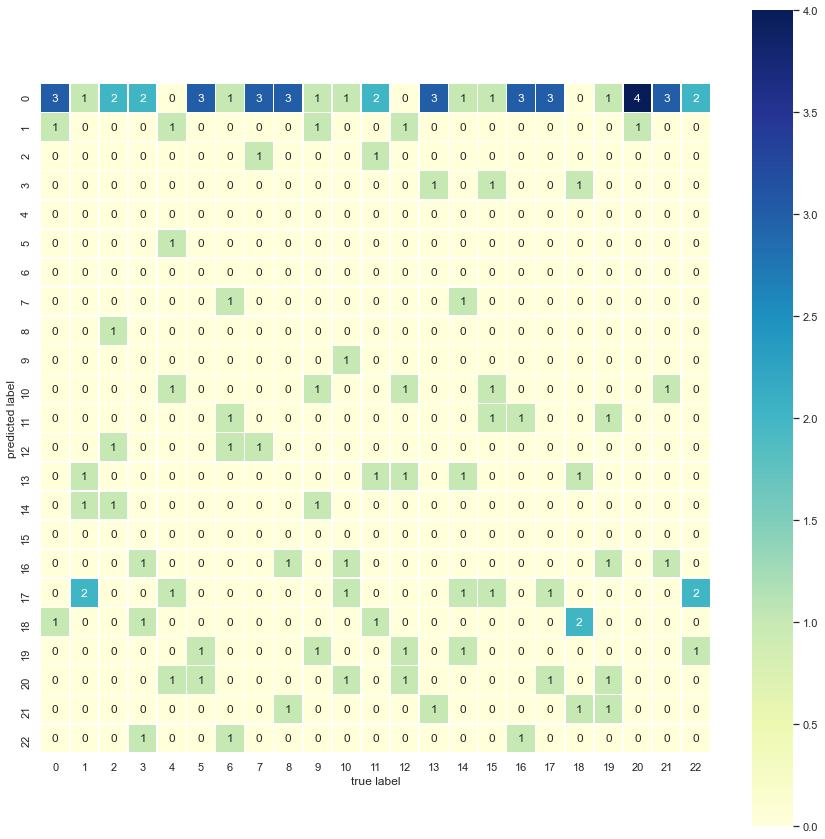

In [49]:
prediction = keras_all_filters_color_many_layers.predict(iterator_rgb_all, verbose=0)
prediction = np.round(prediction)

from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(y_true=iterator_rgb_all.classes, y_pred=np.argmax(prediction, axis=-1))
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="YlGnBu", linewidths=.5, cbar_kws={'orientation': 'vertical'}, ax=ax)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(iterator_rgb_all.class_indices)

TypeError: fit() missing 1 required positional argument: 'x'